In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')

x = dfx.values
y = dfy.values

In [5]:
x.shape

(3750, 1)

In [6]:
y.shape

(3750, 1)

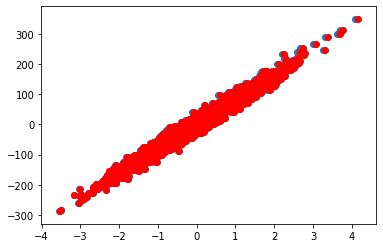

In [7]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y,color='red')
plt.show()

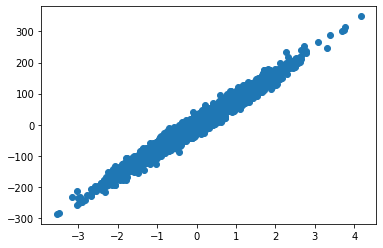

In [8]:
plt.scatter(X,Y)
plt.show()

In [9]:
def y_hat(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    Y_ = y_hat(theta,X)
    e =  np.sum((Y_ - Y)**2)
    m = X.shape[0]
    return e/m

def getGrad(X,Y,theta):
    grad = np.zeros((2,))
    Y_ = y_hat(theta,X)
    
    grad[0] = 2*np.sum(Y_ - Y)
    grad[1] = 2*np.sum( (Y_ - Y)*X)
    m = X.shape[0]
    return grad/m
    

def gradDescent(X,Y,lr=0.01):
    theta = np.zeros((2,))
    
    error_list = []
    for i in range(200):
        grad = getGrad(X,Y,theta)
        theta = theta - lr*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list

In [10]:
final_theta,error_ist = gradDescent(X,Y)

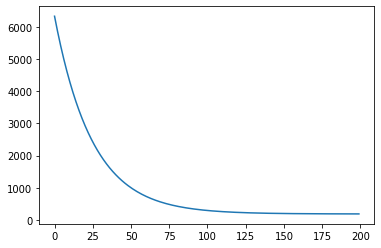

In [11]:
plt.plot(error_ist)
plt.show()

In [12]:
print(final_theta)

[ 0.67184112 78.50035911]


In [13]:
xtest = pd.read_csv('Linear_X_Test.csv')

In [14]:
xtest.shape

(1250, 1)

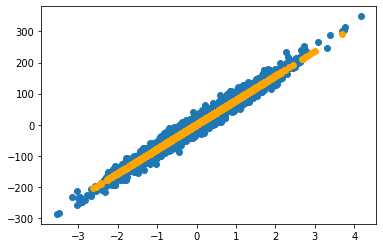

In [15]:
plt.scatter(X,Y)
plt.scatter(xtest,y_hat(final_theta,xtest),color='orange')
plt.show()

             x
0    -1.877944
1    -0.869032
2    -2.530182
3     2.760205
4     0.591000
...        ...
1245 -0.168058
1246  0.932223
1247  0.128008
1248 -0.278038
1249 -0.680425

[1250 rows x 1 columns]
(1250, 1)


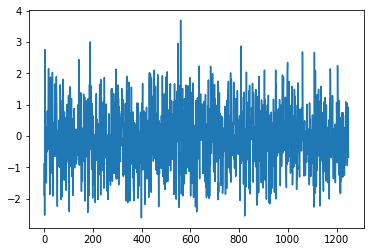

In [16]:
print(xtest)
print(xtest.shape)
plt.plot(xtest)

In [17]:
ytest = y_hat(final_theta,xtest)

In [18]:
ytest

,x
0,-146.747470
1,-67.547476
2,-197.948388
3,217.348960
4,47.065563
...,...
1245,-12.520810
1246,73.851646
1247,10.720501
1248,-21.154210


In [19]:
ytest.shape

(1250, 1)

In [20]:
df = pd.DataFrame(ytest).astype(int)

In [21]:
df

,x
0,-146
1,-67
2,-197
3,217
4,47
...,...
1245,-12
1246,73
1247,10
1248,-21


In [22]:
df.to_csv('ytest.csv',index = False)